In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib



def load_spectrograms(dataset_path):
    X = []
    y = []

    # Iterate through subfolders in the dataset path
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Iterate through spectrogram files in the class folder
        for file_name in os.listdir(class_path):
            if file_name.endswith('.png'):
                file_path = os.path.join(class_path, file_name)

                # Read and resize the spectrogram image
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    # Resize the spectrogram image
                    img = cv2.resize(img, (224, 224))  # Adjust the size as needed

                    # Append the spectrogram and corresponding label to the lists
                    X.append(img)
                    y.append(class_folder)

    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

# Set the path to your 'specs' folder
dataset_path = '../data/specs'

# Load spectrograms and labels
X, y = load_spectrograms(dataset_path)

# Use LabelEncoder to convert string labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=17)

# Optionally, further split the training set into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# # Make predictions on the test set
# y_pred = model.predict_classes(X_test)

# # Decode numerical labels back to strings
# y_test_decoded = label_encoder.inverse_transform(y_test)
# y_pred_decoded = label_encoder.inverse_transform(y_pred)

# # Print classification report
# print(classification_report(y_test_decoded, y_pred_decoded))

Epoch 1/10
2/2 [==============================] - 2s 511ms/step - loss: 74.9150 - accuracy: 0.2250 - val_loss: 161.7270 - val_accuracy: 0.1000
Epoch 2/10
2/2 [==============================] - 1s 252ms/step - loss: 98.4572 - accuracy: 0.4000 - val_loss: 7.4218 - val_accuracy: 0.3000
Epoch 3/10
2/2 [==============================] - 1s 263ms/step - loss: 14.7700 - accuracy: 0.4250 - val_loss: 0.8266 - val_accuracy: 0.9000
Epoch 4/10
2/2 [==============================] - 1s 268ms/step - loss: 4.1742 - accuracy: 0.5750 - val_loss: 6.3881 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 1s 240ms/step - loss: 2.3548 - accuracy: 0.6500 - val_loss: 0.6789 - val_accuracy: 0.9000
Epoch 6/10
2/2 [==============================] - 1s 264ms/step - loss: 1.6037 - accuracy: 0.6250 - val_loss: 0.5017 - val_accuracy: 0.9000
Epoch 7/10
2/2 [==============================] - 1s 245ms/step - loss: 0.4127 - accuracy: 0.7750 - val_loss: 0.7362 - val_accuracy: 0.7000
Epoch 8/10
2/2 

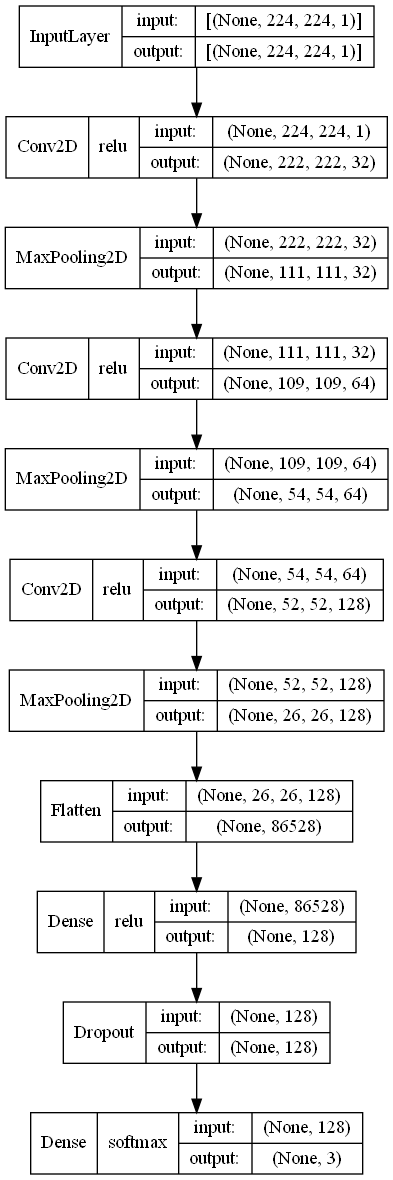

In [4]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)

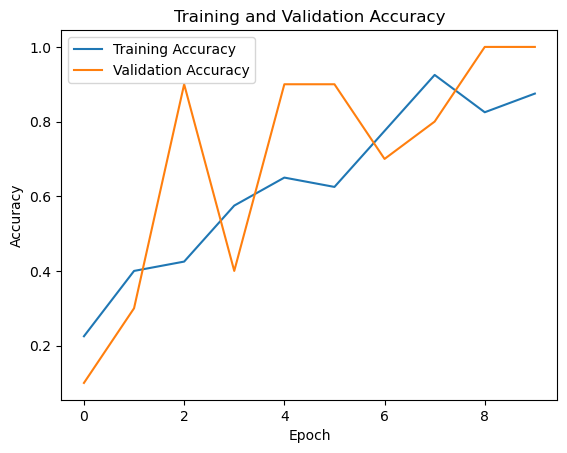

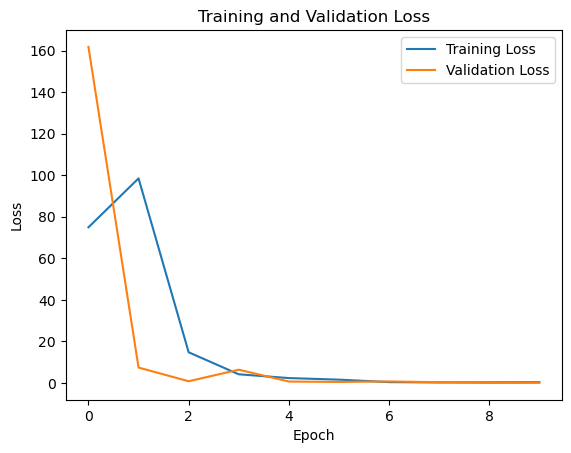

In [7]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
import numpy as np
from sklearn.metrics import classification_report

# ... (previous code for model training)

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Decode numerical labels back to strings
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test_decoded, y_pred_decoded))

1/1 [==============================] - 0s 142ms/step
              precision    recall  f1-score   support

        news       0.80      1.00      0.89         4
       today       1.00      0.67      0.80         3
    tomorrow       1.00      1.00      1.00         6

    accuracy                           0.92        13
   macro avg       0.93      0.89      0.90        13
weighted avg       0.94      0.92      0.92        13



In [7]:
# Save the trained model
model.save('cnn_model.h5')

# Save the LabelEncoder
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']